### SVMs - General Assembly Lesson 11
Code works with both Python 2.7 and 3.6!

In [1]:
# Imports
from sklearn import svm

from ggplot import *  # pip install ggplot
%matplotlib inline
import matplotlib.font_manager
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Very basic example for Support Vector Classifier (SVC)
X_train = [[0, 0], [1, 1]]
X_test = [[2, 2]]
y_train = [0, 1]
clf = svm.SVC()
clf = clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print('clf:', clf)
print()
print('y_train:', y_train)
print('y_pred_train:', y_pred_train)
print()
print('y_pred_test:', y_pred_test)

('clf:', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))
()
('y_train:', [0, 1])
('y_pred_train:', array([0, 1]))
()
('y_pred_test:', array([1]))


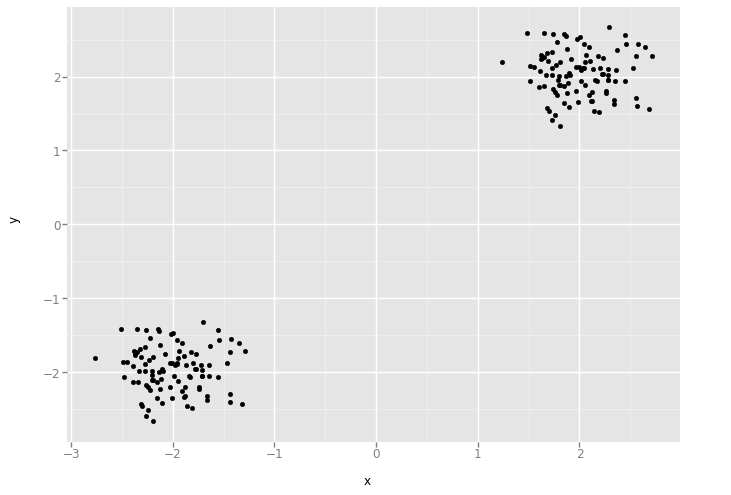

<ggplot: (286001105)>

In [3]:
# Create some random(ish) data
np.random.seed(0)
X = 0.3 * np.random.randn(100, 2)  # Create 100x2 matrix of random numbers (mostly between -0.3 and 0.3)
# Create some "training data" (take X, add 2, then concatenate with X-2)
X_train = np.r_[X + 2, X - 2]  # Try `?np.r` for documentation; output here is 200x2 matrix

# X_train is two clusters, one at (2,2) and one at (-2,-2)
qplot(X_train[:,0], X_train[:,1], geom='point')

In [4]:
?np.r

Object `np.r` not found.


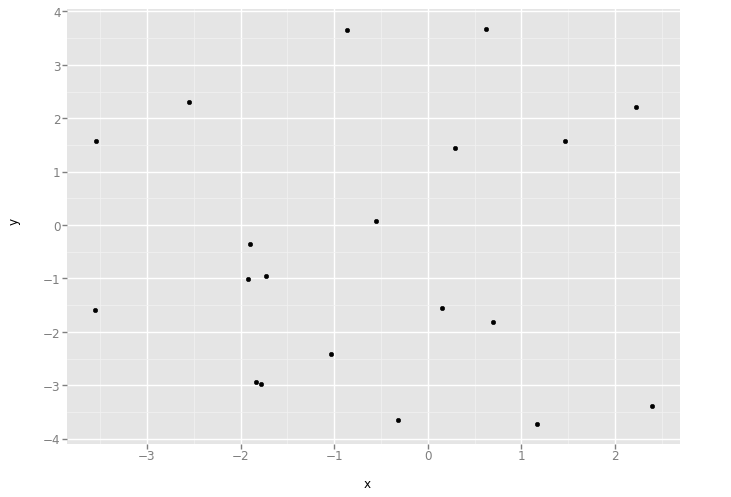

<ggplot: (297097773)>

In [5]:
# Generate some regular novel observations (40 observations)
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]  # Distributed the same as X_train, i.e. clustered around (2,2) and (-2,2)

# Generate some abnormal ("random noise") novel observations (20 observations)
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))  # Distributed uniformly between (-4,-4) and (4,4)

qplot(X_outliers[:,0], X_outliers[:,1], geom='point')

In [6]:
# Fit a "One Class SVM" model (i.e. draw decision boundary around training data)
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)

# Predict classes (i.e. "1" means "looks like training data")
y_pred_train = clf.predict(X_train)  # 200x1 list of 1s and -1s for training data
y_pred_test = clf.predict(X_test)  # 40x1 list of 1s and -1s for test data
y_pred_outliers = clf.predict(X_outliers)  # 20x1 list of 1s and -1s for outliers

# Calculate error rate
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

print( y_pred_train.shape)
print( "y_pred_train:", y_pred_train)
print()
print( y_pred_test.shape)
print( "y_pred_test:", y_pred_test)
print()
print( y_pred_outliers.shape)
print( "y_pred_outliers:", y_pred_outliers)
print()
print( "n_error_train: {0} wrong out of {1} ({2}%)".format(n_error_train, len(y_pred_train), 100 * n_error_train / len(y_pred_train)))
print( "n_error_test: {0} wrong out of {1} ({2}%)".format(n_error_test, len(y_pred_test), 100 * n_error_test / len(y_pred_test)))
print( "n_error_outliers: {0} wrong out of {1} ({2}%)".format(n_error_outliers, len(y_pred_outliers), 100 * n_error_outliers / len(y_pred_outliers)))

(200,)
('y_pred_train:', array([ 1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1., -1.,
        1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1

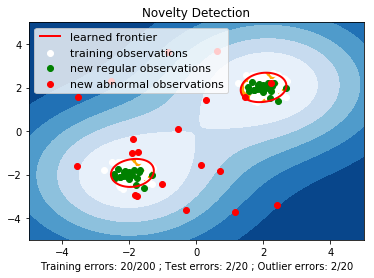

In [7]:
# Visualise all points and decision boundaries for our SVM

# Start off as usual, i.e. create a meshgrid across the whole 2-D space, and predict for that
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Construct the plot
plt.title("Novelty Detection")

# Contours / decision boundary
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)  # Add some contours
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')  # Decision boundary is the first ("level 0") contour
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')  # Shade the insides in orange, just because

# Points
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')  # Training data are in white
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')  # Test data are in green
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')  # Outliers are in red

# Format plot
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))

# Add a legend (with reduced font size)
plt.legend([a.collections[0], b1, b2, c],
           ["learned frontier", "training observations", "new regular observations", "new abnormal observations"],
           loc="upper left",
           prop=matplotlib.font_manager.FontProperties(size=11))

# Add the error rates as subtitle underneath x-axis
plt.xlabel("Training errors: %d/200 ; Test errors: %d/20 ; Outlier errors: %d/20"
           % (n_error_train, n_error_test, n_error_outliers))

# Show it!
plt.show()